In [1]:
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt

%matplotlib inline

# 'Seaborn' is a data visualization library
import seaborn as sns

import warnings  # to avoid warnings
warnings.filterwarnings('ignore')

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Set the plot size
plt.rcParams['figure.figsize'] = [12, 8] 

In [3]:
df = pd.read_csv("Marketing campaign dataset.csv", low_memory=False)

# Display the first 5 rows of the dataframe
df.head(5)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,837,8,SGD,SGD,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2634,44,SGD,SGD,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2135,32,SGD,SGD,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,NaN,0.0,652.173913,2327,48,SGD,SGD,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,1538,20,SGD,SGD,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [4]:
df.shape

(72612, 35)

In [4]:
#clumns in dataset 
missing_data = df.isnull().mean() * 100
missing_data

campaign_item_id         0.000000
no_of_days               0.000000
time                     0.000000
ext_service_id           0.000000
ext_service_name         0.000000
creative_id              0.000000
creative_width           4.698948
creative_height          4.698948
search_tags              0.000000
template_id              4.698948
landing_page             0.000000
advertiser_id            0.000000
advertiser_name          0.000000
network_id               0.000000
approved_budget          0.559136
advertiser_currency      0.000000
channel_id               0.000000
channel_name             0.000000
max_bid_cpm             89.800584
network_margin           0.000000
campaign_budget_usd      0.000000
impressions              0.000000
clicks                   0.000000
stats_currency           0.000000
currency_code            0.000000
exchange_rate            0.000000
media_cost_usd           0.000000
position_in_content    100.000000
unique_reach           100.000000
total_reach   

In [6]:
#type for each columns in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [4]:
total_missing = df.isnull().sum()
percent_missing = (total_missing * 100) / df.isnull().count()
percent_missing = percent_missing.round(decimals=0)
missing_data = pd.DataFrame({
    'Total': total_missing,
    'Percentage of Missing Values': percent_missing,
    'Type': df.dtypes
})
missing_data = missing_data.sort_values(by='Total', ascending=False)

missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.0,float64
total_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
exchange_rate,0,0.0,int64
clicks,0,0.0,int64


In [5]:
df['creative_width'].fillna(300, inplace=True)
df['creative_height'].fillna(250, inplace=True)
df['template_id'].fillna(90, inplace=True)
df['approved_budget'].fillna(0, inplace=True)

In [6]:
df.drop(columns=['position_in_content','unique_reach','total_reach','max_bid_cpm'],inplace=True)
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd
count,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,7.261200e+04,72612.000000,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000
mean,3130.143282,27.036344,49.449127,7450.124842,269.323252,224.436044,83.407701,6195.862213,345.272861,1.251030e+05,21.847780,0.0,617.630284,1370.161847,52.696386,1.0,11.819999
std,142.154918,25.479175,55.881324,4062.384982,90.895958,75.746632,20.404484,387.864576,23.707191,5.611237e+05,23.759286,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,0.000000e+00,1.000000,0.0,2.452316,511.000000,2.000000,1.0,0.000000
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,0.0,205.994550,526.000000,5.000000,1.0,0.435791
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,0.0,377.656676,577.000000,8.000000,1.0,1.709001
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,0.0,755.313351,816.000000,13.000000,1.0,8.276369
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945


In [7]:
df["time"] = pd.to_datetime(df['time'])
df['ctr']=(df['clicks']/df['impressions'])*100

In [13]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords,ctr
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,0.0,652.173913,837,8,SGD,SGD,1,14.058514,Others,SGD,Asia/Singapore,week_end,delicate bracelets,0.955795
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,0.0,652.173913,2634,44,SGD,SGD,1,99.633496,Others,SGD,Asia/Singapore,week_day,summer jewelry,1.670463
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,0.0,652.173913,2135,32,SGD,SGD,1,109.419677,Others,SGD,Asia/Singapore,week_day,artisan jewelry,1.498829
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,0.0,652.173913,2327,48,SGD,SGD,1,115.209499,Others,SGD,Asia/Singapore,week_day,layered bracelets,2.062742
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,0.0,652.173913,1538,20,SGD,SGD,1,66.990104,Others,SGD,Asia/Singapore,week_day,minimalist jewelry,1.300390


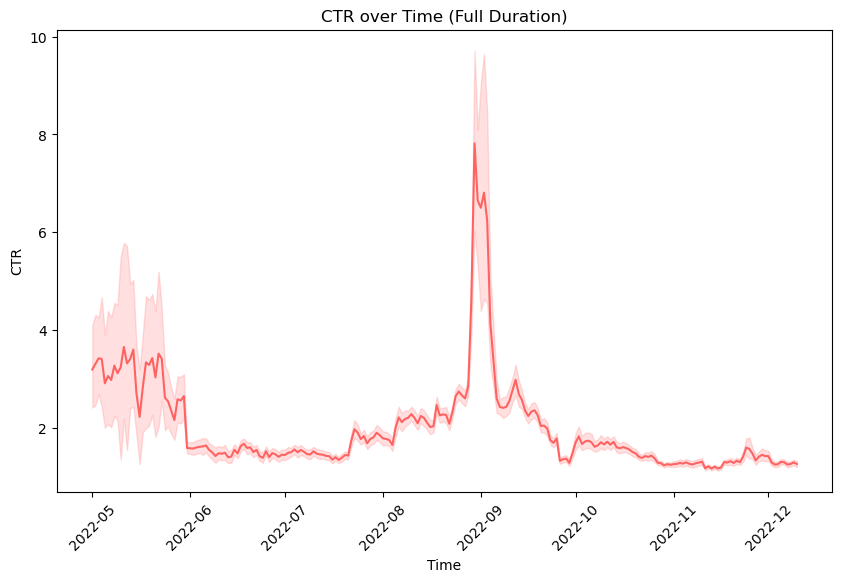

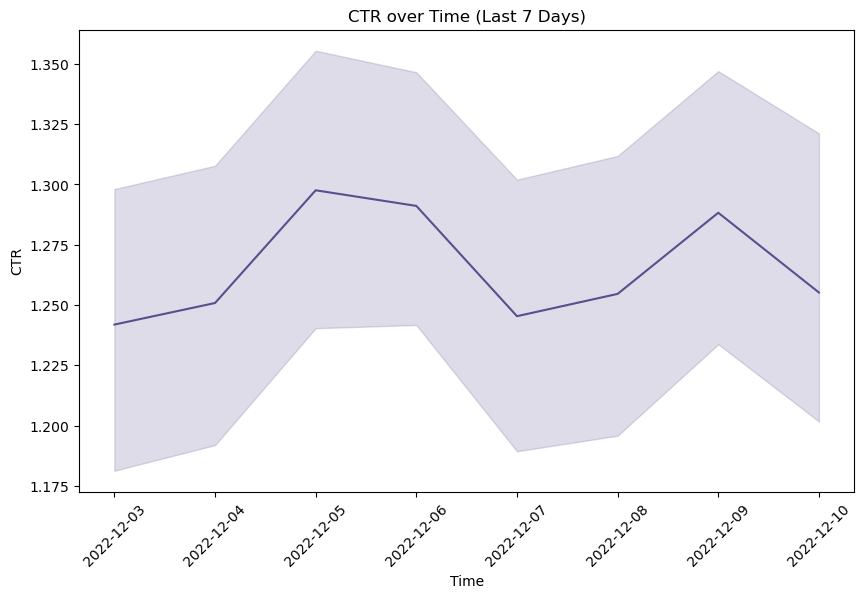

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=df, color='#FF6361')
plt.title('CTR over Time (Full Duration)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)
last_7_days = pd.to_datetime(df['time'].max()) - pd.DateOffset(days=7)
df_last_7_days = df[df['time'] >= last_7_days]

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=df_last_7_days, color='#58508D')
plt.title('CTR over Time (Last 7 Days)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)

plt.show()

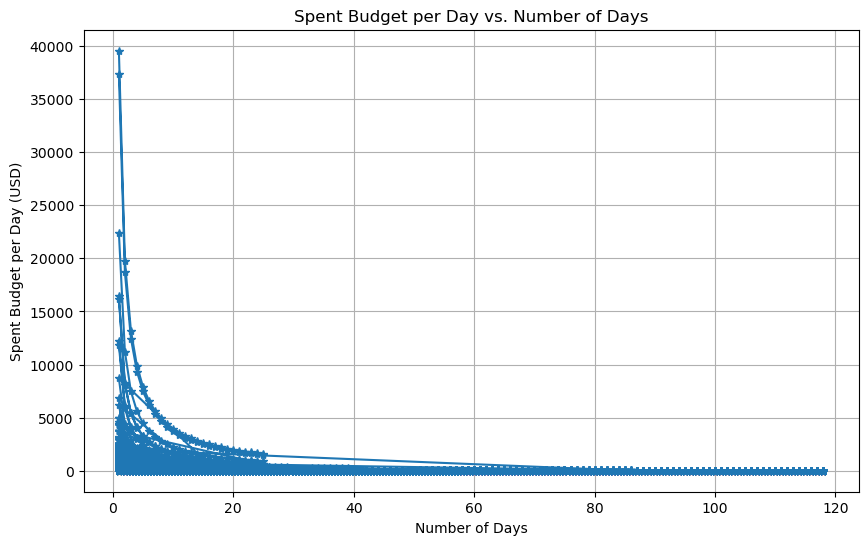

In [10]:
df['spent_budget_per_day'] = df['campaign_budget_usd'] / df['no_of_days']

plt.figure(figsize=(10, 6))
plt.plot(df['no_of_days'], df['spent_budget_per_day'], marker='*')
plt.xlabel("Number of Days")
plt.ylabel("Spent Budget per Day (USD)")
plt.title("Spent Budget per Day vs. Number of Days")
plt.grid(True)
plt.show()

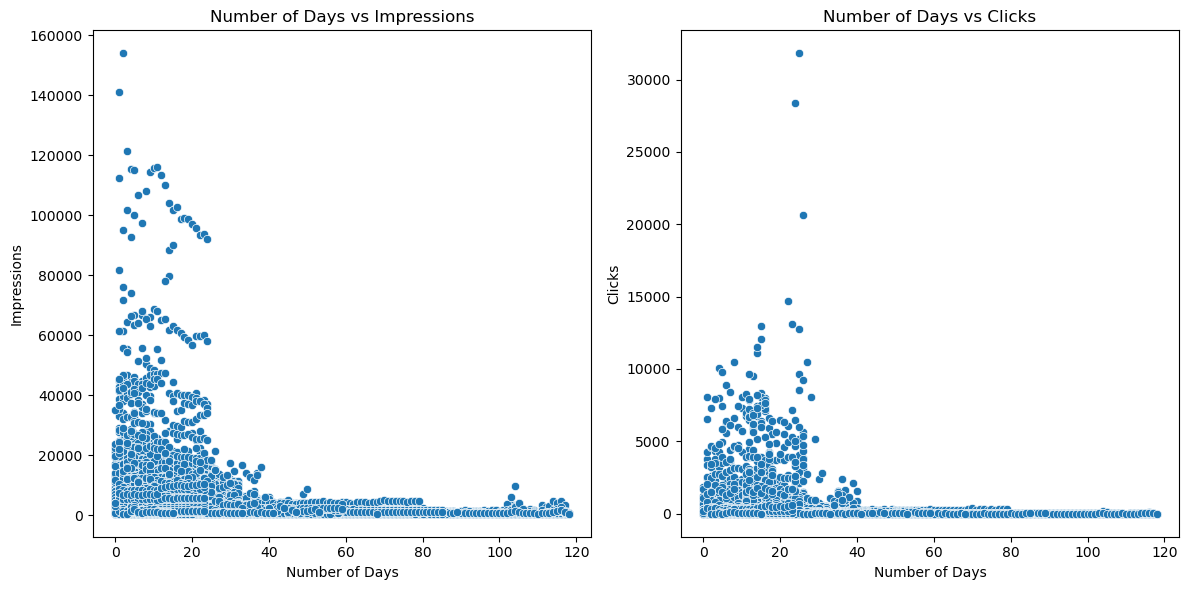

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot: no_of_days vs impressions
sns.scatterplot(data=df, x="no_of_days", y="impressions", ax=axes[0])
axes[0].set_xlabel("Number of Days")
axes[0].set_ylabel("Impressions")
axes[0].set_title("Number of Days vs Impressions")
sns.scatterplot(data=df, x="no_of_days", y="clicks", ax=axes[1])
axes[1].set_xlabel("Number of Days")
axes[1].set_ylabel("Clicks")
axes[1].set_title("Number of Days vs Clicks")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

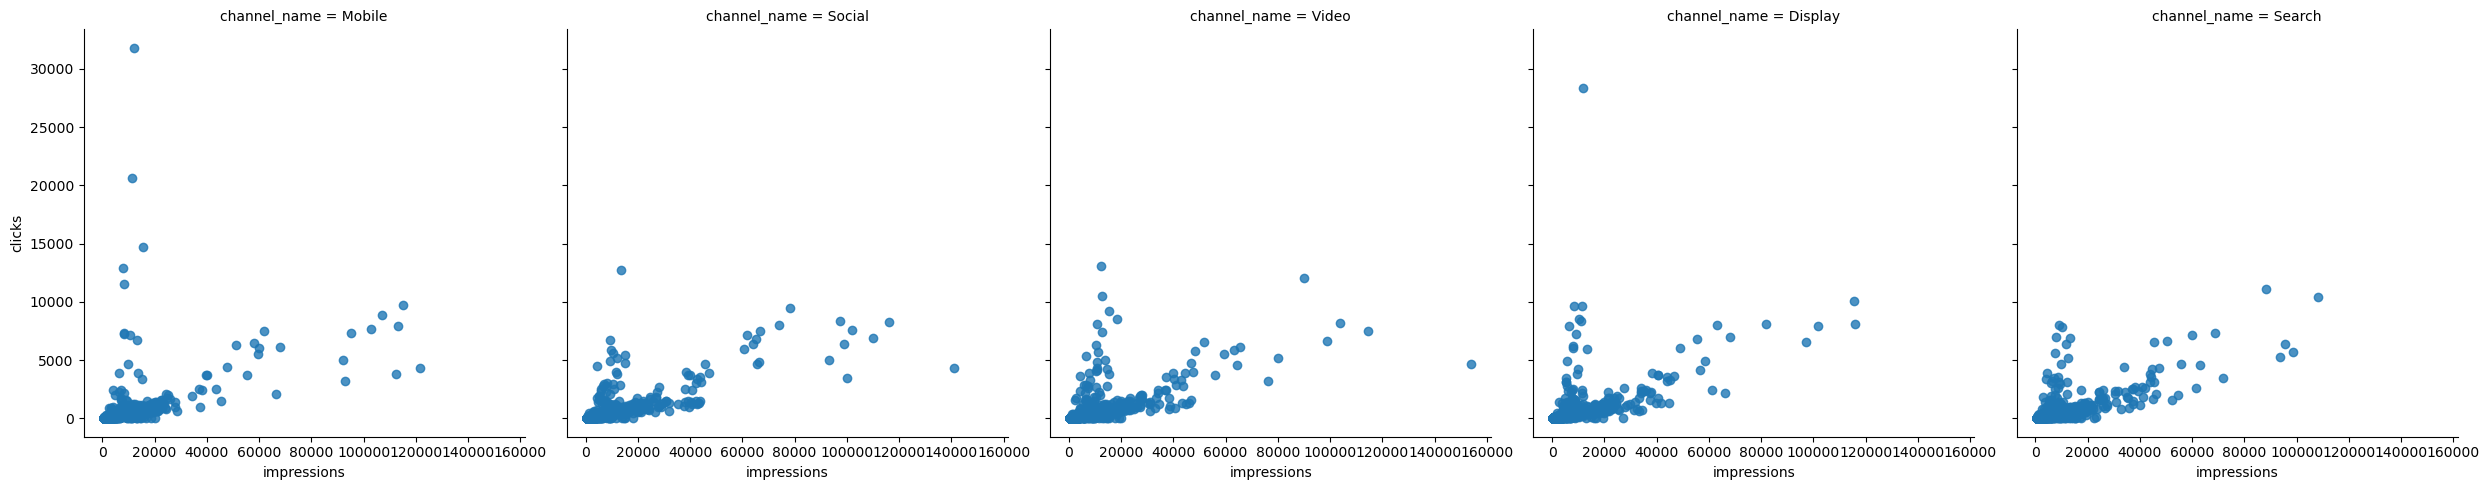

In [15]:
sns.lmplot(x = "impressions", y = "clicks", data = df, fit_reg=False,col = "channel_name")

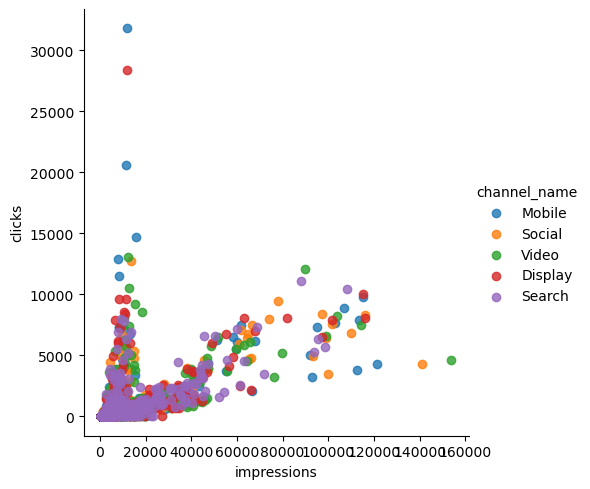

In [16]:
sns.lmplot(x = "impressions", y = "clicks", data = df, fit_reg=False,hue = "channel_name")

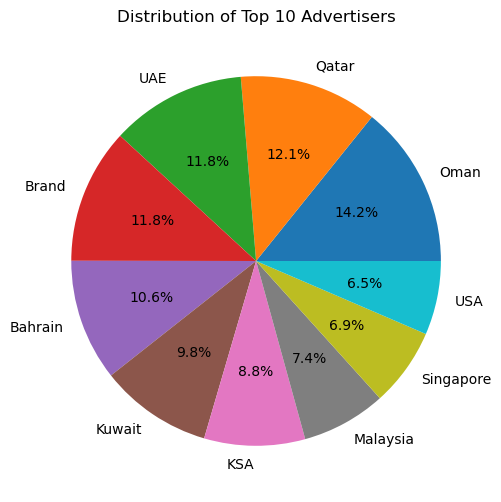

In [18]:
# Plot the pie chart
counts = df['advertiser_name'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Advertisers')
plt.show()

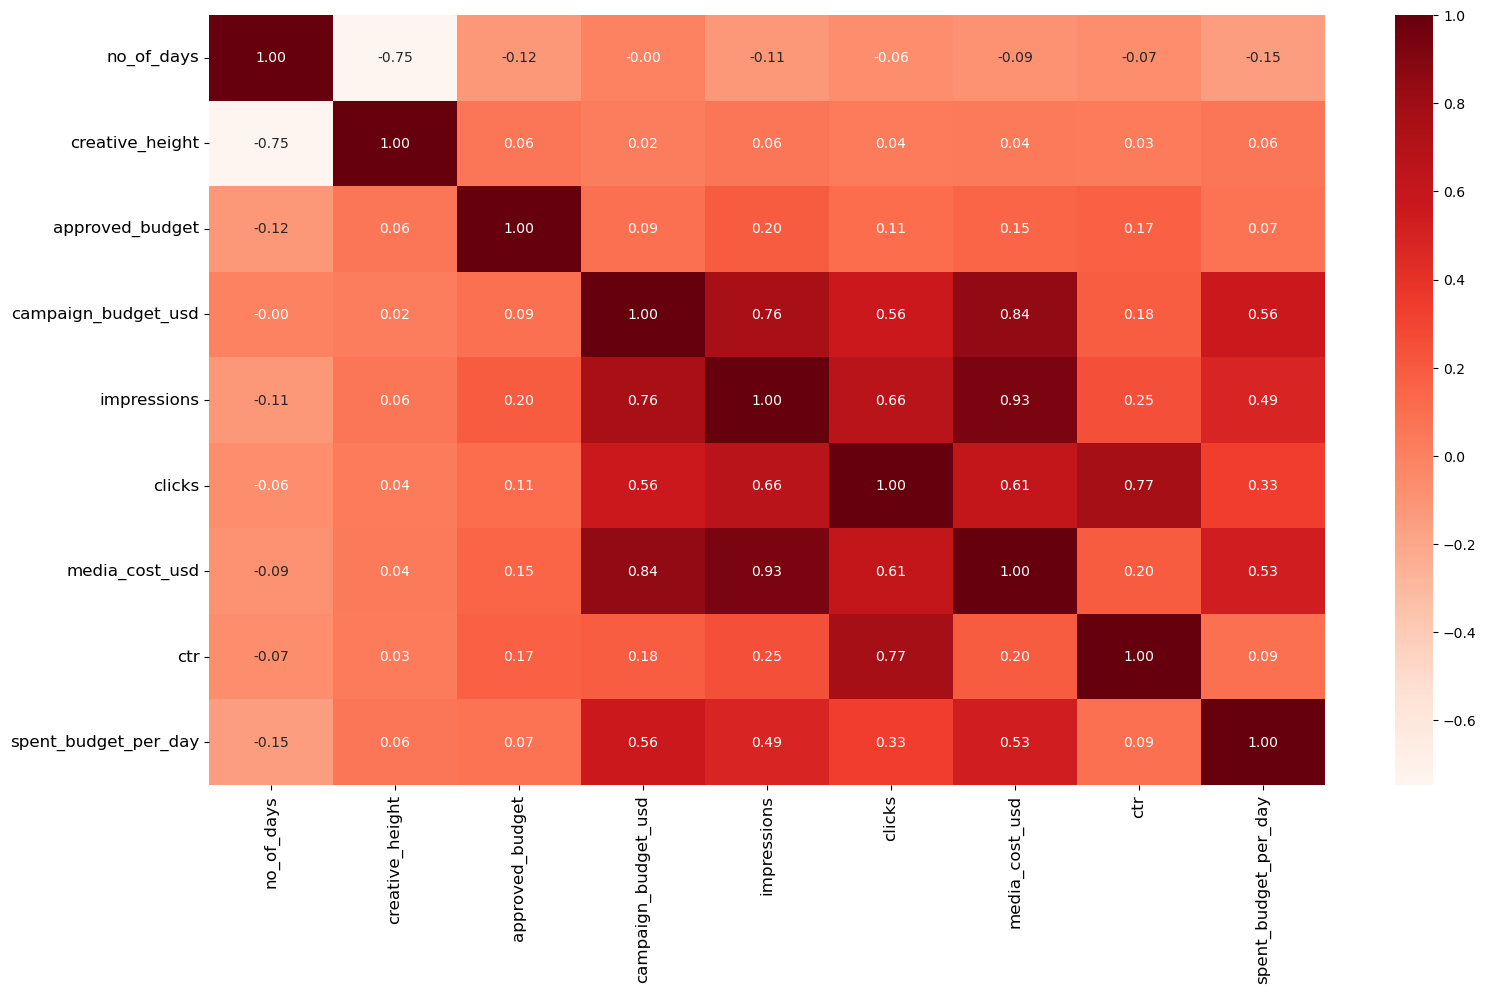

In [33]:
df_num = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
df_num = df_num.loc[:, ~df_num.columns.str.contains('id')]
df_num = df_num.drop(columns = ["exchange_rate","network_margin"])
plt.figure(figsize=(18, 10))
sns.heatmap(df_num.corr(), cmap='Reds', annot=True, fmt=".2f")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [30]:
df_num.describe()

,no_of_days,creative_height,approved_budget,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,ctr,spent_budget_per_day
count,72612.000000,72612.000000,7.261200e+04,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,72612.000000,7.261200e+04
mean,27.036344,224.436044,1.251030e+05,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,1.745022,inf
std,25.479175,75.746632,5.611237e+05,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659,3.091797,NaN
min,0.000000,0.000000,0.000000e+00,0.0,2.452316,511.000000,2.000000,1.0,0.000000,0.088731,7.052412e-02
25%,9.000000,250.000000,6.000000e+03,0.0,205.994550,526.000000,5.000000,1.0,0.435791,0.936476,7.663488e+00
50%,19.000000,250.000000,1.000000e+04,0.0,377.656676,577.000000,8.000000,1.0,1.709001,1.371951,1.839237e+01
75%,37.000000,250.000000,1.500000e+04,0.0,755.313351,816.000000,13.000000,1.0,8.276369,1.876173,5.381471e+01
max,118.000000,250.000000,6.000000e+06,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945,265.611691,inf


In [36]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

df_num = df_num[~np.isinf(df_num).any(axis=1)]
X = df_num.drop(columns = ['ctr'])
y = df_num['ctr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

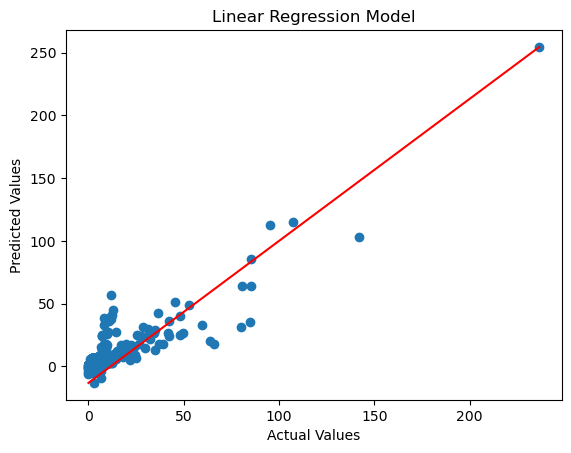

MSE: 2.4089164920877013
MAE: 0.7474116031173734
RMSE: 1.5520684559927442


In [37]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

In [43]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': clf.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                Feature   Coefficient
5                clicks  9.099665e-03
6        media_cost_usd  5.730015e-03
2       approved_budget  8.249189e-07
7  spent_budget_per_day -2.706516e-04
3   campaign_budget_usd -3.326927e-04
4           impressions -3.996643e-04
1       creative_height -1.320062e-03
0            no_of_days -7.822044e-03


In [ ]:
# time related features 
def create_date_features(df):
    df['month'] = df.date.dt.month.astype("int8")
    df['day_of_month'] = df.date.dt.day.astype("int8")
    df['day_of_year'] = df.date.dt.dayofyear.astype("int16")
    df['week_of_month'] = (df.date.apply(lambda d: (d.day-1) // 7 + 1)).astype("int8")
    df['week_of_year'] = (df.date.dt.weekofyear).astype("int8")
    df['day_of_week'] = (df.date.dt.dayofweek + 1).astype("int8")
    df['year'] = df.date.dt.year.astype("int32")
    df["is_wknd"] = (df.date.dt.weekday // 4).astype("int8")
    df["quarter"] = df.date.dt.quarter.astype("int8")
    df['is_month_start'] = df.date.dt.is_month_start.astype("int8")
    df['is_month_end'] = df.date.dt.is_month_end.astype("int8")
    df['is_quarter_start'] = df.date.dt.is_quarter_start.astype("int8")
    df['is_quarter_end'] = df.date.dt.is_quarter_end.astype("int8")
    df['is_year_start'] = df.date.dt.is_year_start.astype("int8")
    df['is_year_end'] = df.date.dt.is_year_end.astype("int8")
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = pd.Series(np.where(df.month.isin([9, 10, 11]), 3, df["season"])).astype("int8")
    return df

In [ ]:
    # Create bins for ride length
    bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
    names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

    # Create a new column for ride length category
    df['ride_length_category'] = pd.cut(df['ride_length'], bins, labels=names)